# <div align="center">Distinction Between Outliers & High Leverage Observations</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import warnings

warnings.filterwarnings('ignore')
    
%matplotlib inline

plt.style.use('seaborn')

In [2]:
db = '/home/lidong/Datasets/'

influence_df = pd.read_csv(os.path.join(db, 'Statistics/influence.txt'), sep='\s', usecols=[1, 2])
n = influence_df.index.size
influence_df[-3:]

,x,y
17,8.71607,50.0568
18,8.70156,46.5475
19,9.16463,45.7762


Text(0.5,1,'ScatterPlot of y vs x')

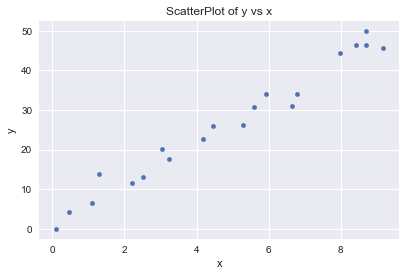

In [3]:
fig, ax = plt.subplots()
influence_df.plot.scatter('x', 'y', ax=ax)
fig.tight_layout(pad=2)
ax.set_title("ScatterPlot of y vs x")

## Outlier Point

In [4]:
# Add outlier point(4, 40)
outlier_point = np.array([4, 40])
influence_df.loc[n] = outlier_point
influence_df[-3:]

,x,y
18,8.70156,46.5475
19,9.16463,45.7762
20,4.00000,40.0000


这个Outlier point是Influence Point吗?, 需要继续分析, 增加删除该异常值是否对response Y和coefficient, 统计检验由影响.

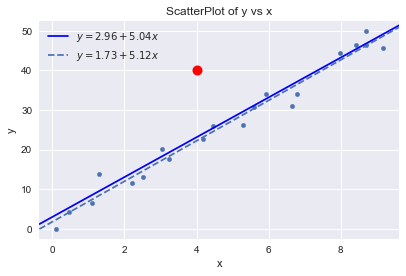

In [5]:
fitted_result_included_outlier = smf.ols(formula="y ~ x", data=influence_df[0:n+1]).fit()
fitted_result_excluded_outlier = smf.ols(formula="y ~ x", data=influence_df[0:n]).fit()

intercept, coef_x = fitted_result_included_outlier.params

sm.graphics.abline_plot(
    model_results=fitted_result_included_outlier,
    ax=ax, color='b',
    label='$y = %.2f + %.2fx$' % (intercept, coef_x))

intercept, coef_x = fitted_result_excluded_outlier.params

sm.graphics.abline_plot(
    model_results=fitted_result_excluded_outlier,
    ax=ax, linestyle='dashed',
    label='$y = %.2f + %.2fx$' % (intercept, coef_x))

ax.scatter([4], [40], c='r', linewidths=3, marker='o')
ax.legend()
fig

In [6]:
print(fitted_result_included_outlier.summary())
print("\n\n")
print(fitted_result_excluded_outlier.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     192.2
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.18e-11
Time:                        20:34:58   Log-Likelihood:                -61.294
No. Observations:                  21   AIC:                             126.6
Df Residuals:                      19   BIC:                             128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9576      2.009      1.472      0.1

从回归线和统计检验看出, 该Outlier点不是强影响点Influence.

查看: R-squared, coef[x], std err[x], P

## Leverage

In [7]:
# Mod Leverage point(14, 68)
leverage_point = np.array([14, 68])
influence_df.loc[n] = leverage_point
influence_df[-3:]

,x,y
18,8.70156,46.5475
19,9.16463,45.7762
20,14.00000,68.0000


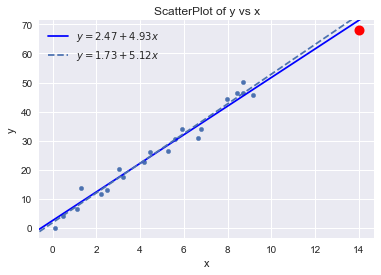

In [8]:
fig, ax = plt.subplots()
influence_df.plot.scatter('x', 'y', ax=ax)
ax.set_title("ScatterPlot of y vs x")

fitted_result_included_leverage = smf.ols(formula="y ~ x", data=influence_df[0:n+1]).fit()
fitted_result_excluded_leverage = smf.ols(formula="y ~ x", data=influence_df[0:n]).fit()

intercept, coef_x = fitted_result_included_leverage.params

sm.graphics.abline_plot(
    model_results=fitted_result_included_leverage, ax=ax, color='b',
    label='$y = %.2f + %.2fx$' % (intercept, coef_x))

intercept, coef_x = fitted_result_excluded_leverage.params

sm.graphics.abline_plot(
    model_results=fitted_result_excluded_leverage,
    ax=ax, linestyle='dashed',
    label='$y = %.2f + %.2fx$' % (intercept, coef_x))

ax.scatter([14], [68], c='r', linewidths=3, marker='o')
ax.legend()

In [9]:
print(fitted_result_included_leverage.summary())
print("\n\n")
print(fitted_result_excluded_leverage.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     821.4
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           4.23e-17
Time:                        20:34:59   Log-Likelihood:                -49.676
No. Observations:                  21   AIC:                             103.4
Df Residuals:                      19   BIC:                             105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4679      1.076      2.294      0.0

通过回归图和统计检验数据, 判断该Leverage Point也不是Influence Point.

## Outlier and Leverage

In [10]:
# Mod Leverage point(13, 15)
outlier_leverage_point = np.array([13, 15])
influence_df.loc[n] = outlier_leverage_point 
influence_df[-3:]

,x,y
18,8.70156,46.5475
19,9.16463,45.7762
20,13.00000,15.0000


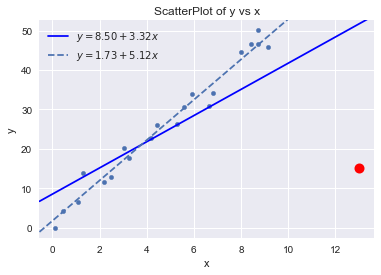

In [11]:
fig, ax = plt.subplots()
influence_df.plot.scatter('x', 'y', ax=ax)
ax.set_title("ScatterPlot of y vs x")

fitted_result_included_outlier_leverage = smf.ols(formula="y ~ x", data=influence_df[0:n+1]).fit()
fitted_result_excluded_outlier_leverage = smf.ols(formula="y ~ x", data=influence_df[0:n]).fit()

intercept, coef_x = fitted_result_included_outlier_leverage.params

sm.graphics.abline_plot(
    model_results=fitted_result_included_outlier_leverage,
    ax=ax, color='b',
    label='$y = %.2f + %.2fx$' % (intercept, coef_x))

intercept, coef_x = fitted_result_excluded_outlier_leverage.params

sm.graphics.abline_plot(
    model_results=fitted_result_excluded_outlier_leverage,
    ax=ax, linestyle='dashed',
    label='$y = %.2f + %.2fx$' % (intercept, coef_x))

ax.scatter([13], [15], c='r', linewidths=3, marker='o')
ax.legend()

In [12]:
print(fitted_result_included_outlier_leverage.summary())
print("\n\n")
print(fitted_result_excluded_outlier_leverage.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     23.41
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           0.000114
Time:                        20:34:59   Log-Likelihood:                -78.017
No. Observations:                  21   AIC:                             160.0
Df Residuals:                      19   BIC:                             162.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5046      4.222      2.014      0.0

这个观测值对回归分析影响很大是Influence Point, 可以剔除.